# ロバスト性能

次のノミナルモデルに対して、コントローラーを$K=1$としたときについて考える ([2]の7章演習問題の問5を参照)。
$$
P(s) = \frac{1}{s}
$$

In [1]:
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
P = tf([0, 1], [1, 0])
K = 1

### 不確かさの重み関数が以下で与えられたときのロバスト安定条件を確認
$$
W_2(s) = \frac{s}{1.5}
$$

In [16]:
W2 = tf([1, 0], [0, 1.5])
print(W2)


 s
---
1.5



In [17]:
T = feedback(P*K, 1)
print(T)


  1
-----
s + 1



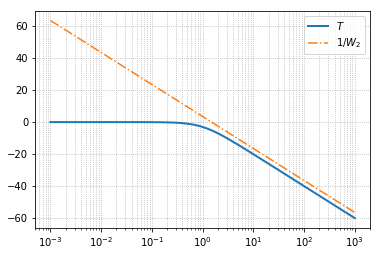

In [41]:
fig, ax = plt.subplots()

gain, _, w = bode(T, logspace(-3, 3), Plot=False)
ax.semilogx(w, 20*np.log10(gain), ls='-', lw=2, label='$T$')
gain, _, w = bode(1/W2, logspace(-3, 3), Plot=False)
ax.semilogx(w, 20*np.log10(gain), ls='-.', label='$1/W_2$')
ax.grid(which='both', ls=':')
plt.legend()

$|W_2|T < 1$を満たすため、ロバスト安定性を満たす。

### 制御性能の重み関数が以下で与えられたときのノミナル性能条件を確認
$$
W_1(s) = \frac{1}{1.5s}
$$

In [46]:
W1 = tf([0, 1], [1.5, 0])
print(W1)


  1
-----
1.5 s



In [42]:
S = feedback(1, P*K)
print(S)


  s
-----
s + 1



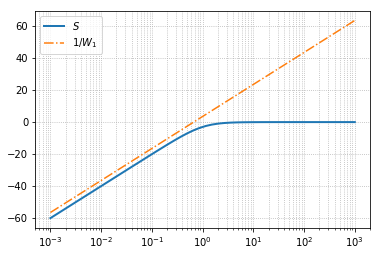

In [43]:
fig, ax = plt.subplots()

gain, _, w = bode(S, logspace(-3, 3), Plot=False)
ax.semilogx(w, 20*np.log10(gain), ls='-', lw=2, label='$S$')
gain, _, w = bode(1/W1, logspace(-3, 3), Plot=False)
ax.semilogx(w, 20*np.log10(gain), ls='-.', label='$1/W_1$')
ax.grid(which='both', ls=':')
plt.legend()

$|W_1S| < 1$を満たすため、ノミナル性能を満たす。

### ロバスト性能を確認

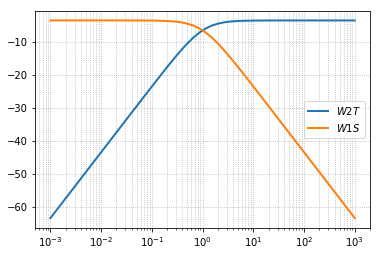

In [44]:
fig, ax = plt.subplots()

gain, _, w = bode(T*W2, logspace(-3, 3), Plot=False)
ax.semilogx(w, 20*np.log10(gain), ls='-', lw=2, label='$W2T$')
gain, _, w = bode(S*W1, logspace(-3, 3), Plot=False)
ax.semilogx(w, 20*np.log10(gain), ls='-', lw=2, label='$W1S$')
ax.grid(which='both', ls=':')
plt.legend()

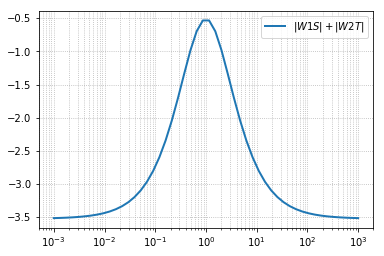

In [45]:
fig, ax = plt.subplots()

gain1, _, w = bode(T*W2, logspace(-3, 3), Plot=False)
gain2, _, w = bode(S*W1, logspace(-3, 3), Plot=False)
ax.semilogx(w, 20*np.log10(gain1+gain2), ls='-', lw=2, label='$|W1S|+|W2T|$')
ax.grid(which='both', ls=':')
plt.legend()

$|W_1S + W_2T| < 1$を満たすため、ロバスト性能を満たす。

## 参考文献
[1] 南裕樹 (2019) 『Pythonによる制御工学入門』 オーム社  
[2] 杉江俊治・藤田政之 (1999) 『フィードバック制御入門』 コロナ社